In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Loading the Dataset </h3>

In [4]:
data = pd.read_csv("/content/drive/MyDrive/coin_Bitcoin.csv")

<h3> EDA </H3>

In [5]:
data.head() 

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [7]:
data=data.drop(['SNo'],axis=1)

In [8]:
data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [9]:
data.describe(include="all")

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
count,2991,2991,2991,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
unique,1,1,2991,NaN,NaN,NaN,NaN,NaN,NaN
top,Bitcoin,BTC,2018-08-19 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN
freq,2991,2991,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,NaN,NaN,NaN,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,NaN,NaN,NaN,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,NaN,NaN,NaN,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,NaN,NaN,NaN,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,NaN,NaN,NaN,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       2991 non-null   object 
 1   Symbol     2991 non-null   object 
 2   Date       2991 non-null   object 
 3   High       2991 non-null   float64
 4   Low        2991 non-null   float64
 5   Open       2991 non-null   float64
 6   Close      2991 non-null   float64
 7   Volume     2991 non-null   float64
 8   Marketcap  2991 non-null   float64
dtypes: float64(6), object(3)
memory usage: 210.4+ KB


<h3> Checking for Null Values </H3>

In [11]:
data.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

<h3> Checking for Duplicate Value </h3>

In [12]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<h3> Data preprocessing </h3>

In [13]:
data['Date']=pd.to_datetime(data['Date'])

In [14]:
data.set_index('Date',inplace=True)

In [15]:
data.head(10)

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2013-04-29 23:59:59,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
2013-05-04 23:59:59,Bitcoin,BTC,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
2013-05-05 23:59:59,Bitcoin,BTC,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
2013-05-06 23:59:59,Bitcoin,BTC,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
2013-05-07 23:59:59,Bitcoin,BTC,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09


In [16]:
data1=data['Close']

<h3> Crypto Price for Bitcoin vs Time Frame </h3>

## Plot the Time Series to understand the behaviour of the data.

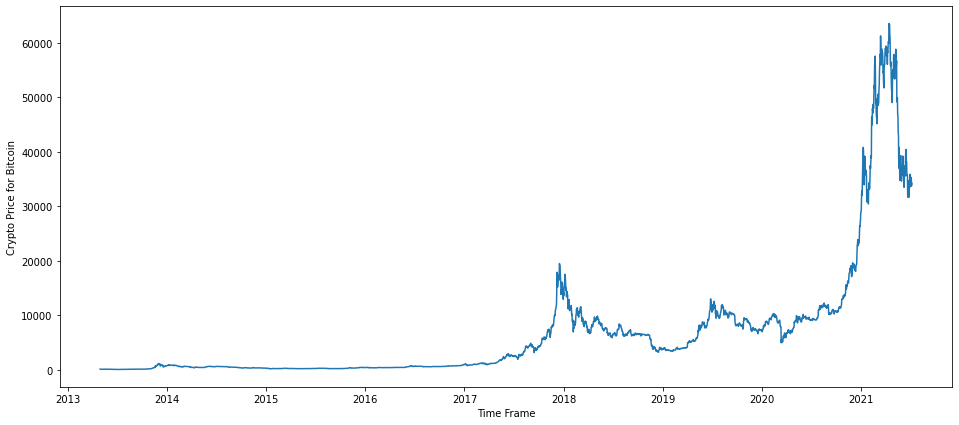

In [17]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Crypto Price for Bitcoin')
ax1.plot(data1)

## Plot the average Close per year and the year on year percentage change of Close.

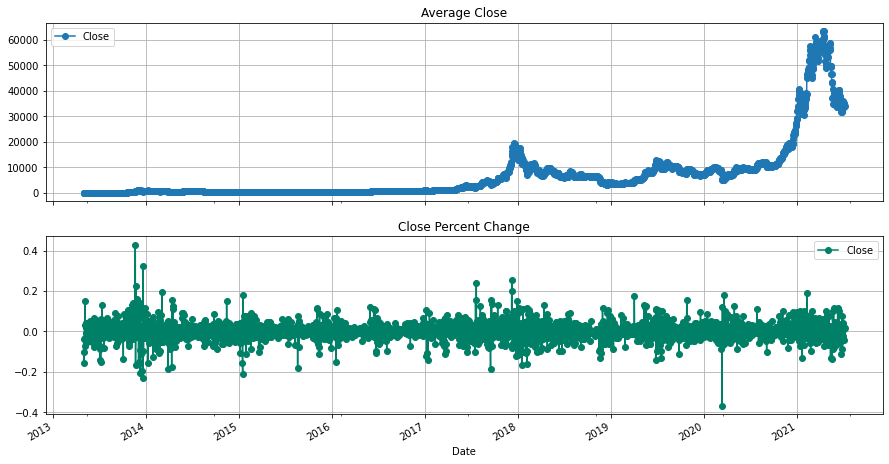

In [18]:
average    = data.groupby(data.index)["Close"].mean()
pct_change = data.groupby(data.index)["Close"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Close",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Close Percent Change",grid=True)

## Check for stationarity of the whole Time Series data.

In [19]:
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
test_result=adfuller(data['Close'])

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(data['Close'])

ADF Test Statistic : -0.7973098451195627
p-value : 0.8199110033239145
#Lags Used : 29
Number of Observations Used : 2961
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<h3> Differencing </h3>

In [24]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(1)

In [25]:
data['Close'].shift(1)

Date
2013-04-29 23:59:59             NaN
2013-04-30 23:59:59      144.539993
2013-05-01 23:59:59      139.000000
2013-05-02 23:59:59      116.989998
2013-05-03 23:59:59      105.209999
                           ...     
2021-07-02 23:59:59    33572.117653
2021-07-03 23:59:59    33897.048590
2021-07-04 23:59:59    34668.548402
2021-07-05 23:59:59    35287.779766
2021-07-06 23:59:59    33746.002456
Name: Close, Length: 2991, dtype: float64

In [26]:
data['Seasonal First Difference Close']=data['Close'] - data['Close'].shift(12)

In [27]:
data.head(14)

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Close First Difference,Seasonal First Difference Close
Date,,,,,,,,,,
2013-04-29 23:59:59,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,NaN,NaN
2013-04-30 23:59:59,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,-5.539993,NaN
2013-05-01 23:59:59,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,-22.010002,NaN
2013-05-02 23:59:59,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,-11.779999,NaN
2013-05-03 23:59:59,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,-7.459999,NaN
2013-05-04 23:59:59,Bitcoin,BTC,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09,14.750000,NaN
2013-05-05 23:59:59,Bitcoin,BTC,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09,3.410004,NaN
2013-05-06 23:59:59,Bitcoin,BTC,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09,-3.610001,NaN
2013-05-07 23:59:59,Bitcoin,BTC,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09,-0.800003,NaN


In [28]:
adfuller_test(data['Seasonal First Difference Close'].dropna())

ADF Test Statistic : -6.309960520099772
p-value : 3.2528838344258735e-08
#Lags Used : 29
Number of Observations Used : 2949
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


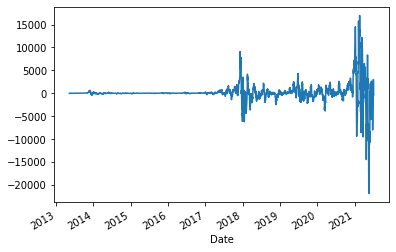

In [29]:
data['Seasonal First Difference Close'].plot()

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the Seasonal First Difference Close Data.

In [38]:
pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 5.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [42]:
import statsmodels.api as sm

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

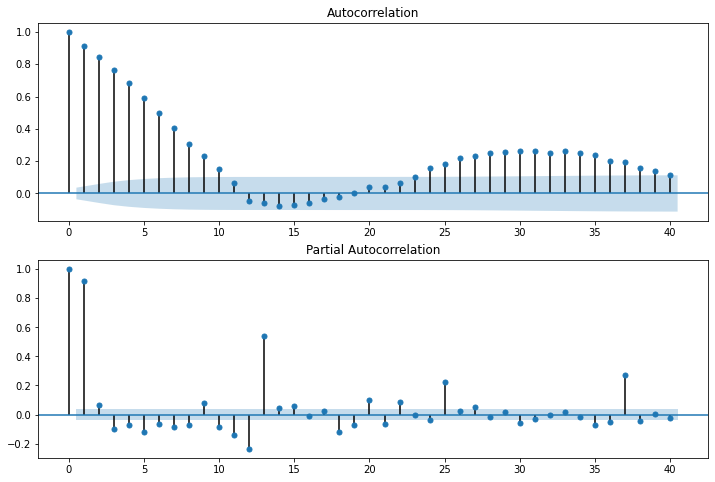

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference Close'].iloc[13:],lags=40,ax=ax2)

<h3> ARIMA Model Building </h3>

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model=ARIMA(data['Close'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  if date_index:
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  if date_index:


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2990
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -23298.205
Method:                       css-mle   S.D. of innovations            585.872
Date:                Mon, 10 Jan 2022   AIC                          46604.409
Time:                        14:09:31   BIC                          46628.421
Sample:                    04-30-2013   HQIC                         46613.048
                         - 07-06-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.4012     10.220      1.116      0.265      -8.629      31.431
ar.L1.D.Close    -0.5679      0.141     -4.016      0.000      -0.845      -0.291
ma.L1.D.Close     0.4955      0.149      3.323      0.001       0.203       0.788
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7610           +0.0000j            1.7610            0.5000
MA.1           -2.0183           +0.0000j            2.0183            0.5000
-----------------------------------------------------------------------------
"""

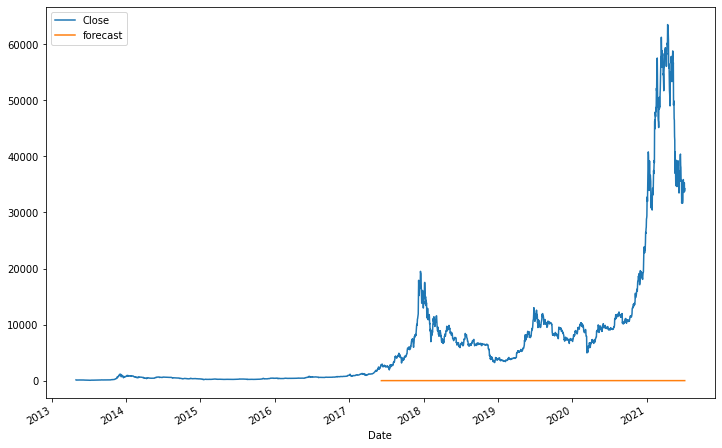

In [48]:
data['forecast']=model_fit.predict(start=1500,end=2991,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

<h3> Since dataset is seasonal arima model performing terribly in case of seasonal data we need to go for SARIMA </h3>

<h3> SARIMA Model Budilding </h3>

In [49]:
import statsmodels.api as sm 

In [50]:
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  if date_index:


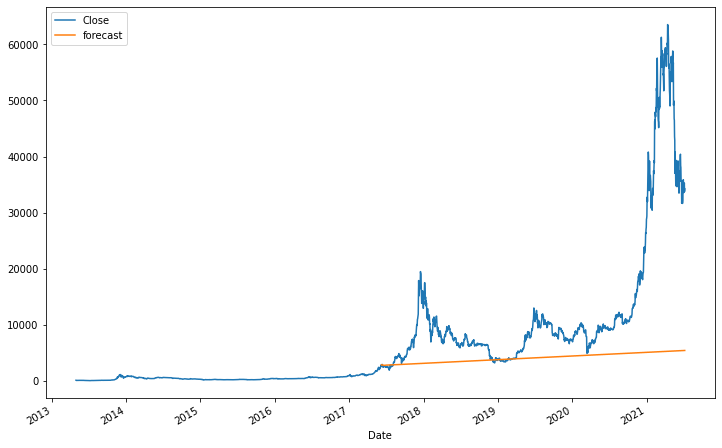

In [51]:
data['forecast']=results.predict(start=1500,end=2991,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

In [52]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [53]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [54]:
future_datest_df.head()


,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Close First Difference,Seasonal First Difference Close,forecast
2021-08-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
future_datest_df.tail()

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Close First Difference,Seasonal First Difference Close,forecast
2023-02-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-06 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
future_df=pd.concat([data,future_datest_df])

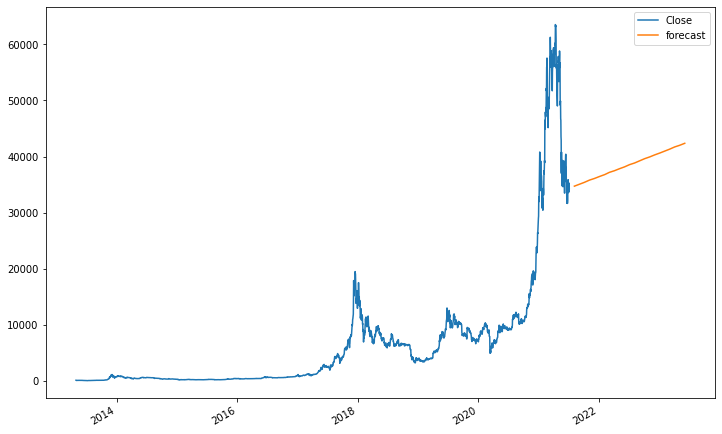

In [57]:
future_df['forecast'] = results.predict(start = 2991, end =5000, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8))

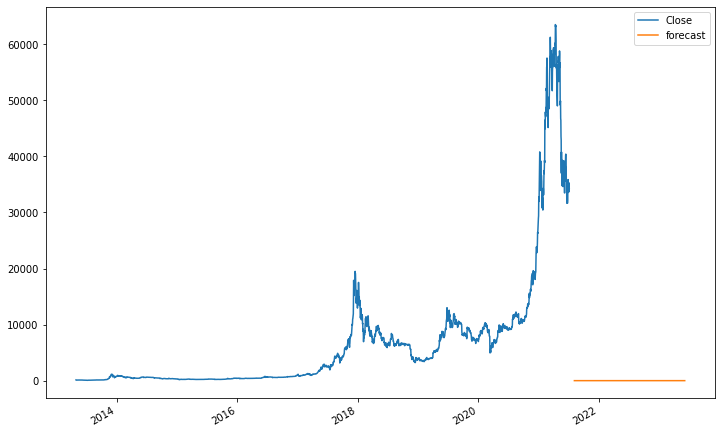

In [58]:
future_df['forecast'] = model_fit.predict(start = 2991, end =5000, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8)) 